# Python Fundamentals

In [216]:
#import statements
import pandas as pd
from pygal_maps_world.maps import COUNTRIES
from pygal_maps_world.maps import World
from matplotlib import pyplot as plt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from pycountry_convert import country_name_to_country_alpha2

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

# read .cvs file
df = pd.read_csv('articleInfo.csv')
dg = pd.read_csv('authorInfo.csv')

<AxesSubplot: title={'center': 'Yearly Publications'}, xlabel='Year', ylabel='Number of Articles'>

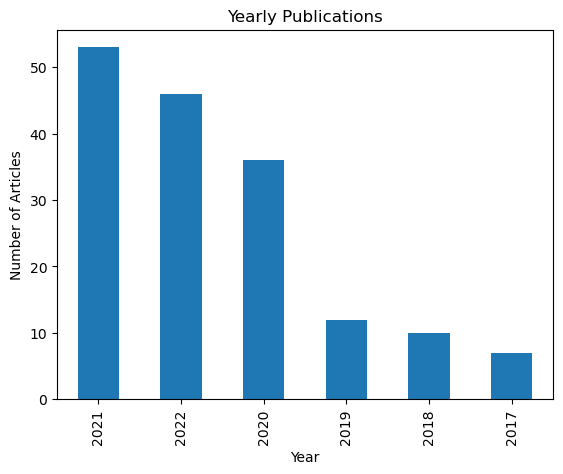

In [217]:
#merge articles on article number
dh = df.merge(dg, on = "Article No.", how = 'outer')

#display(dh)
#dh = dh.groupby(['Article No.', 'Title','Year','Author Number', 'Key Words', 'Citation', 'Source', 'Abstract', 'Type'])['Author Name'].apply(', '.join).reset_index()

#change all NaN values to 0
dh = dh.fillna(0)

#display(dh)

#aggregate article count for given years
dY = df['Year'].value_counts()
dY.sort_values(ascending=True)
dY.plot(kind = "bar", title = "Yearly Publications", xlabel = "Year", ylabel = "Number of Articles")

<AxesSubplot: title={'center': 'Yearly Citations'}, xlabel='Year', ylabel='Number of Citations'>

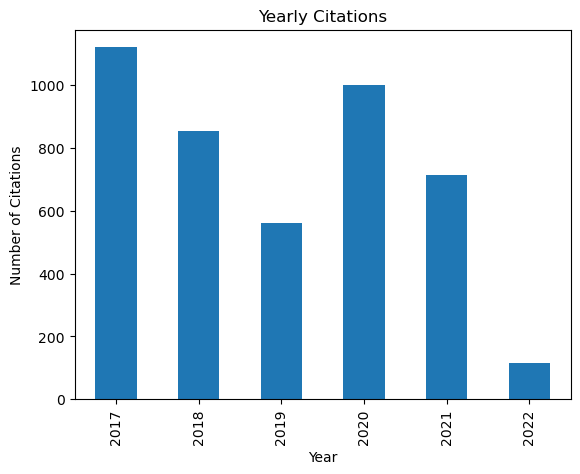

In [218]:
#sum up number of citations for articles based off of publishing year
citations = df.groupby(by='Year')['Citation'].sum()
citations.plot(kind = "bar", title = "Citations by Year", xlabel = "Year", ylabel = "Number of Citations")

In [219]:
#function to convert country names from dataframe to country codes usable with pygal
def get_country_code(country_name):
    country_codes = []
    for x in country_name:
        for code, name in COUNTRIES.items():
            if name == x:
                country_codes.append(code)
    # If the country wasn't found, return None.
    return country_codes

In [220]:
wm = World()
wm.title = 'Publications per Country'

cn_a2_code =  get_country_code(dh['Country'])
t = [*set(cn_a2_code)]
cn_a2_code_counts = dict((x,cn_a2_code.count(x)) for x in set(cn_a2_code))
display(cn_a2_code_counts)

wm.add = ('Publication', cn_a2_code_counts)
wm.render_to_file("mapPublications.svg")
# print(cn_a2_code_counts)
# countries = pd.DataFrame(cn_a2_code_counts, index = t)

# display(countries)


{'de': 26,
 'in': 3,
 'fr': 7,
 'ch': 5,
 'it': 19,
 'my': 6,
 'kg': 1,
 'nz': 6,
 'ie': 17,
 'ae': 1,
 'cn': 34,
 'cz': 15,
 'ca': 12,
 'cy': 7,
 'mx': 3,
 'gr': 5,
 'no': 2,
 'hk': 8,
 'gb': 30,
 'ua': 6,
 'au': 13,
 'es': 9,
 'li': 2,
 'za': 17,
 'cl': 3,
 'pk': 6,
 'sk': 7}

In [221]:
#determine top 5 contributing organizations in the world
affiliation = dh[dh['Author Affiliation'] != 0]
orgs = affiliation['Author Affiliation'].value_counts(ascending=False)
display(orgs.head(5))

#Highest contributions from American organizations
usa = dh.loc[dh['Country'] == "USA"]
orgs1 = usa['Author Affiliation'].value_counts(ascending=False)
display(orgs1.head(5))

University of the Western Cape         17
Masaryk University                     12
University College Cork                11
Intel Corporation                      11
The Chinese University of Hong Kong     8
Name: Author Affiliation, dtype: int64

Intel Corporation                          11
Madigan Army Medical Center                 8
University of California, Santa Barbara     5
University of Texas at Arlington            4
Michigan State University                   4
Name: Author Affiliation, dtype: int64

In [222]:
#determine the five authors with the highest h-index
dg = dg[["Author Name", "Author Affiliation", "h-index"]]
dg = dg.sort_values(by=['h-index'], ascending=False)
display(dg.head(5))


,Author Name,Author Affiliation,h-index
117,Ulrich Trautwein,University of Tübingen,95.0
102,Nicolas Molinari,"LIRDEF, Montpellier university",63.0
130,George S. Athwal,Western University,59.0
140,Maria Luisa Lorusso,Scientific Institute IRCCS E,33.0
147,Vicente A. González,University of Auckland,33.0


# Regression

In [162]:
df = pd.read_csv('data.csv')
df = df.drop('Unnamed: 6', axis = 1)
df = df.fillna(0)

df.corr(method='pearson')['SUS'].sort_values()

Intent_Error   -0.693675
ASR_Error      -0.662405
Duration       -0.006631
Gender          0.111523
Purchase        0.661931
SUS             1.000000
Name: SUS, dtype: float64

C:\Users\annas\AppData\Local\Temp\ipykernel_40844\582553291.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df['SUS'], palette='bright')


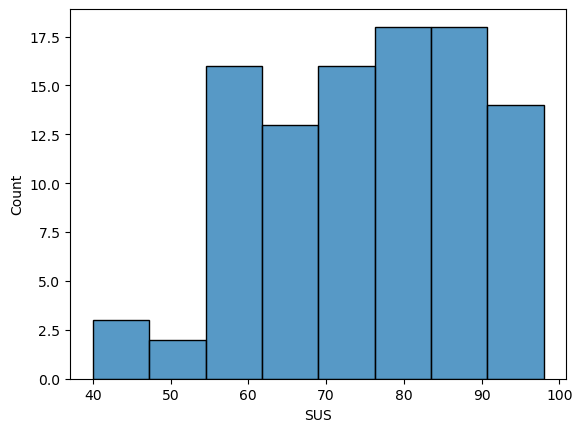

In [163]:
sns.histplot(data=df['SUS'], palette='bright')
plt.show()

In [164]:
y = df['SUS'] # dependent variable
x = df.drop(columns='SUS') # independent variables

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary());

                            OLS Regression Results                            
Dep. Variable:                    SUS   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     27.39
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           5.25e-17
Time:                        20:36:01   Log-Likelihood:                -362.39
No. Observations:                 100   AIC:                             736.8
Df Residuals:                      94   BIC:                             752.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           93.0282      5.541     16.788   

In [166]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print("The R square score of linear regression model is: ", lr.score(x_test,y_test))

quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(x)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print("The R square score of 2-order polynomial regression model is: ", plr.score(X_test,Y_test))

The R square score of linear regression model is:  0.3799136196221108
The R square score of 2-order polynomial regression model is:  0.522049850342869


# Classification

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

import matplotlib.pyplot as plt

In [168]:
df = pd.read_csv('data.csv')
df = df.drop('Unnamed: 6', axis = 1)

new_df = df

new_df['Purchase'] = new_df['Purchase'].fillna(df['Purchase'].mean())
new_df['SUS'] = new_df['SUS'].fillna(df['SUS'].mean())
new_df['Duration'] = new_df['Duration'].fillna(df['Duration'].mean())
new_df['Gender'] = new_df['Gender'].fillna(df['Gender'].mean())
new_df['ASR_Error'] = new_df['ASR_Error'].fillna(df['ASR_Error'].mean())
new_df['Intent_Error'] = new_df['Intent_Error'].fillna(df['Intent_Error'].mean())

new_df.isna().sum()

Purchase        0
SUS             0
Duration        0
Gender          0
ASR_Error       0
Intent_Error    0
dtype: int64

C:\Users\annas\AppData\Local\Temp\ipykernel_40844\2662223677.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=new_df['Purchase'], palette='bright')


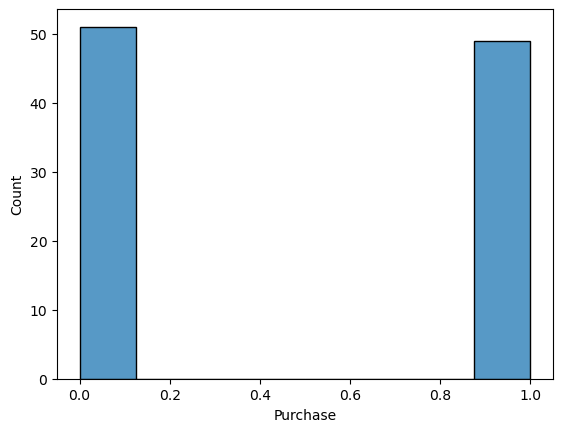

In [169]:
sns.histplot(data=new_df['Purchase'], palette='bright')
plt.show()

In [176]:
from imblearn.over_sampling import SMOTE

In [177]:
y = new_df['Purchase'].to_numpy()
X = new_df.drop('Purchase', axis = 1).to_numpy()

scale = StandardScaler()
scaled_X = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3)

In [178]:
oversample = SMOTE()
over_sampled_X_train, over_sampled_y_train = oversample.fit_resample(X_train, y_train)

lc = LogisticRegression()
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

In [179]:
lc.fit(over_sampled_X_train, over_sampled_y_train)
svc.fit(over_sampled_X_train, over_sampled_y_train)
nbc.fit(over_sampled_X_train, over_sampled_y_train)
rfc.fit(over_sampled_X_train, over_sampled_y_train)

RandomForestClassifier()

In [180]:
y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.95      1.00      0.97        19

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.95      1.00      0.97        19

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.95      0.95      0.95        19

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

              preci

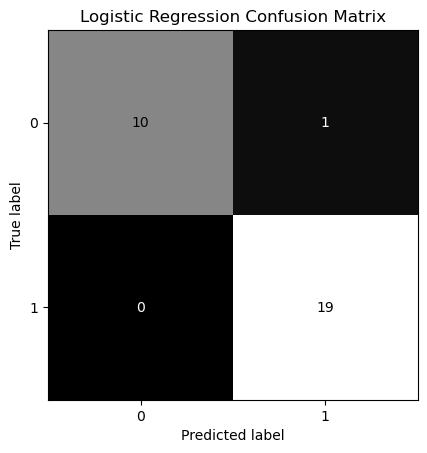

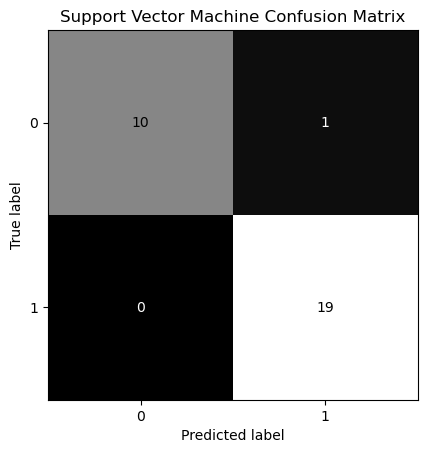

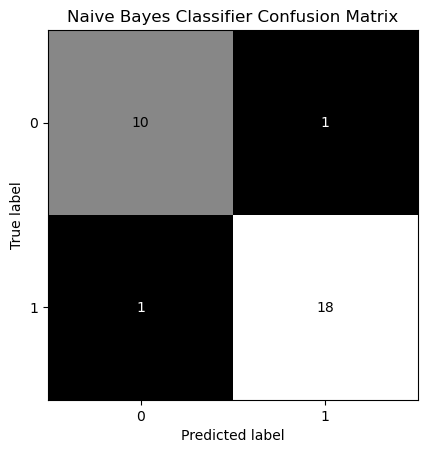

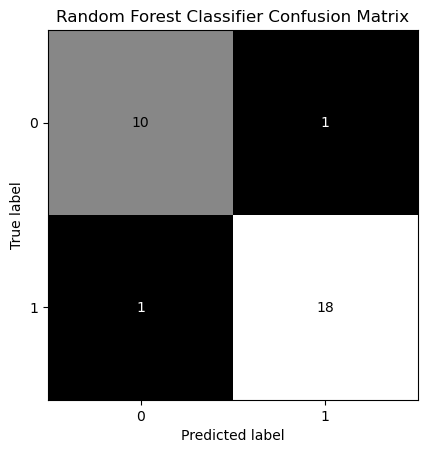

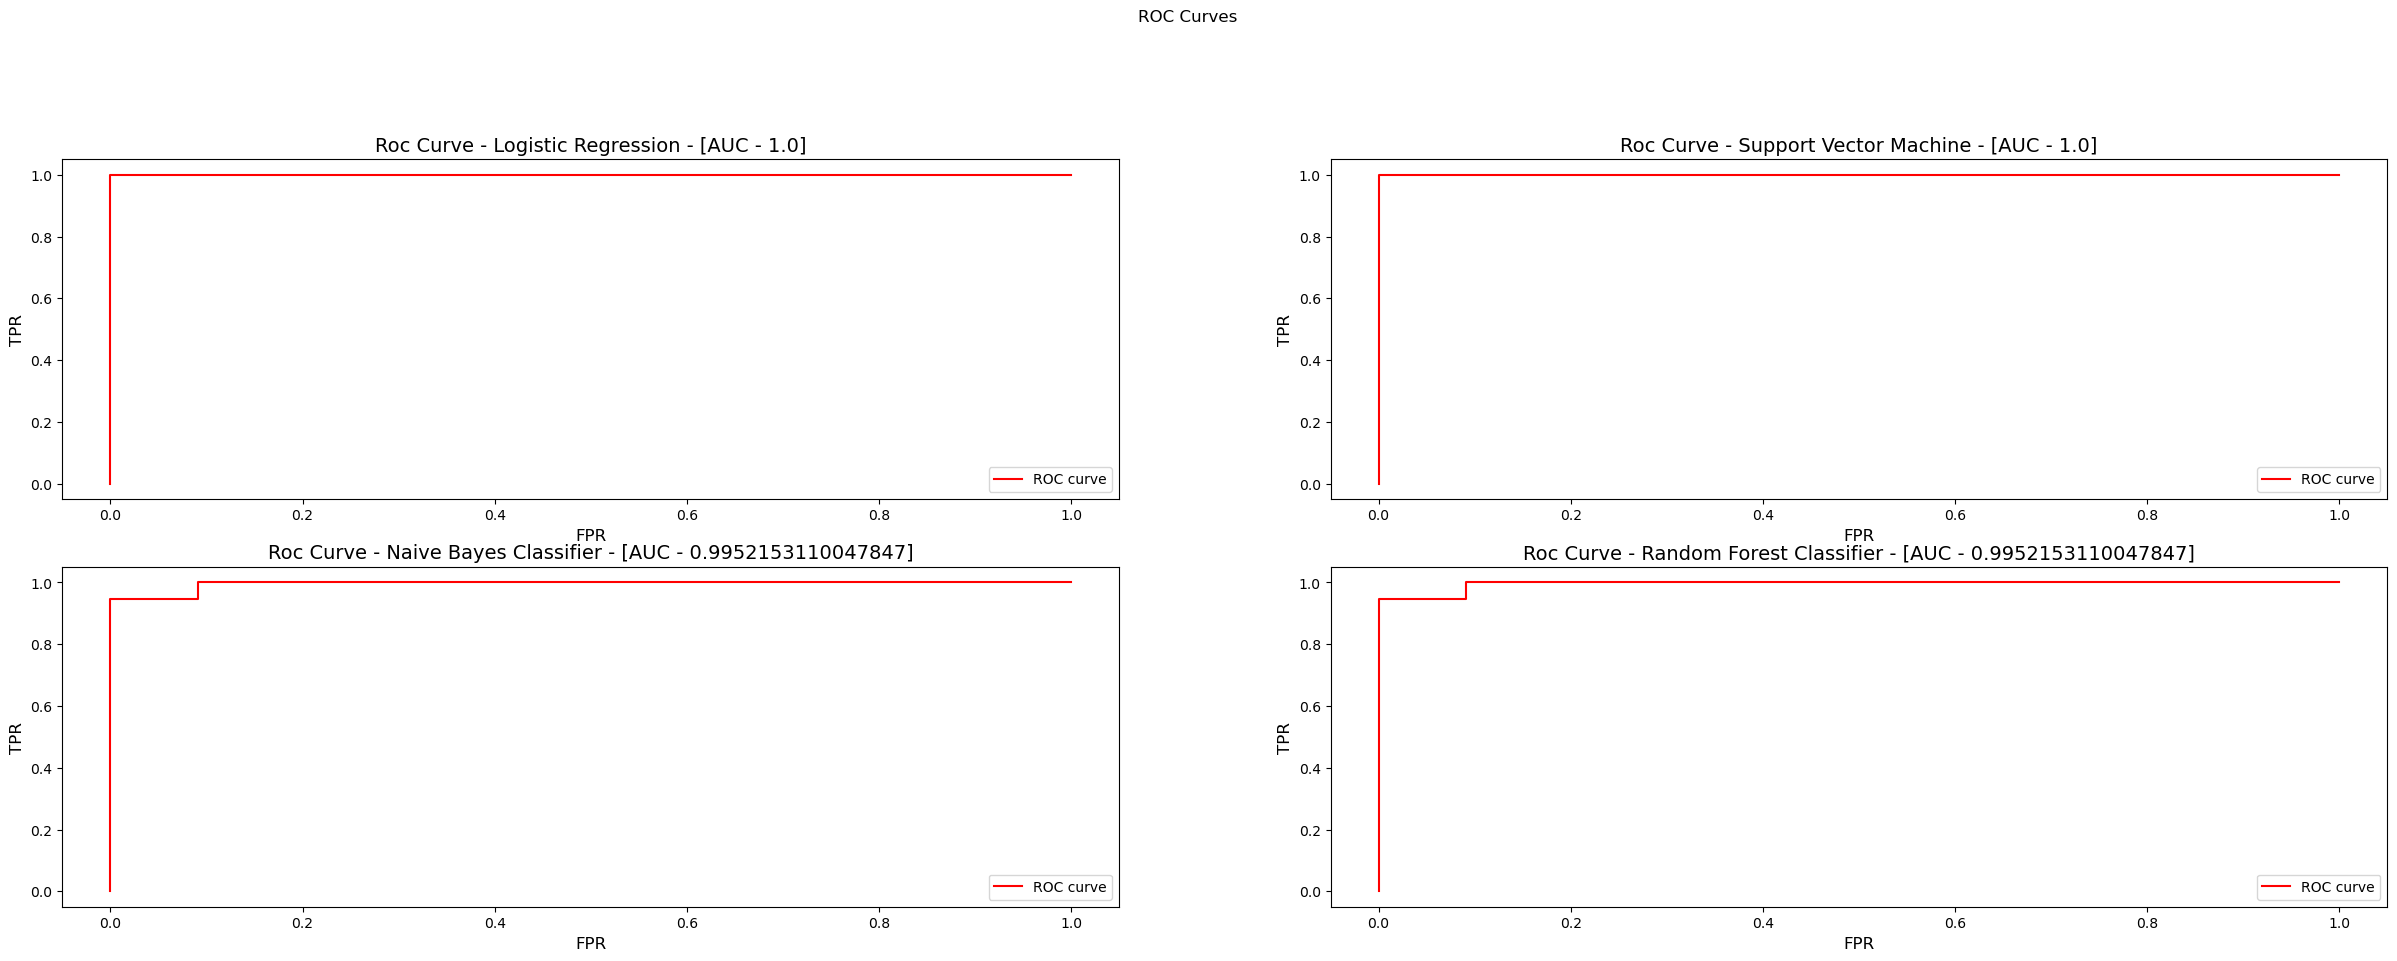

In [223]:
print(classification_report(y_test, y_lc_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

models = ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()